### **Importing Libraries**

In [ ]:
import gzip
import numpy as np
import pandas as pd 

### **Importing data**

In [ ]:
x_train_images = '/content/train-images-idx3-ubyte.gz'
y_train_labels = '/content/train-labels-idx1-ubyte.gz'

x_test_images = '/content/t10k-images-idx3-ubyte.gz'
y_test_labels = '/content/t10k-labels-idx1-ubyte.gz'

with gzip.open(y_train_labels, 'rb') as trainlabelspath:
     y_train_labels_mod = np.frombuffer(trainlabelspath.read(), dtype=np.uint8,
                               offset=8)
with gzip.open(x_train_images, 'rb') as trainimagespath:
     x_train_images_mod = np.frombuffer(trainimagespath.read(), dtype=np.uint8,
                               offset=16).reshape(len(y_train_labels_mod), 784)

with gzip.open(y_test_labels, 'rb') as testlabelspath:
     y_test_labels_mod = np.frombuffer(testlabelspath.read(), dtype=np.uint8,
                               offset=8)

with gzip.open(x_test_images, 'rb') as testimagespath:
     x_test_images_mod = np.frombuffer(testimagespath.read(), dtype=np.uint8,
                               offset=16).reshape(len(y_test_labels_mod), 784)    

In [ ]:
print(y_train_labels_mod.shape)
print(x_train_images_mod.shape)
print(y_test_labels_mod.shape)
print(x_test_images_mod.shape)

(60000,)
(60000, 784)
(10000,)
(10000, 784)


### **Combining imported data**

In [ ]:
x,y = np.r_[x_train_images_mod,x_test_images_mod], np.r_[y_train_labels_mod,y_test_labels_mod]

In [ ]:
samples = 7000 #for each class there are 7000 images
x = x[:samples]/255
y = y[:samples].astype('int')

In [ ]:
print(x.shape)
print(y.shape)

(7000, 784)
(7000,)


### **Visualizing the data**

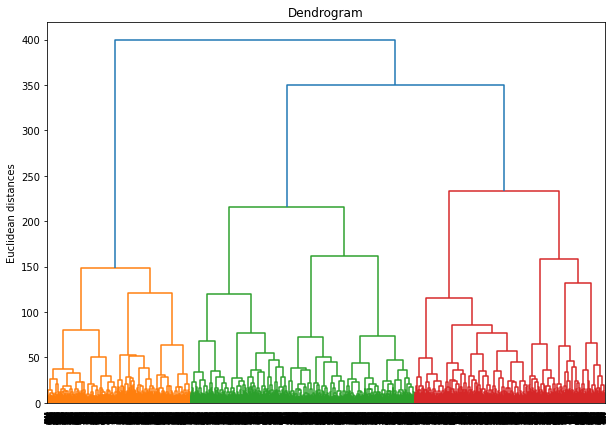

In [ ]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
#To find the no.of optimum clusters here it is 3
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(x, method  = "ward"))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()

### **Splitting the data**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# splitting dataset inro train and test and val (70:20:10)
X_train, x_test, Y_train, y_test = train_test_split(x,y, test_size=0.2, shuffle = True, random_state = 42)#x,y are 
#considering 1/8 part of x and y train into validation i.e., (1/8)*0.8 = 0.1 (10% is validation set)
x_train, x_valid, y_train, y_valid = train_test_split(X_train, Y_train, test_size=1/8, random_state= 42) 

In [ ]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

print(x_valid.shape)
print(y_valid.shape)

(4900, 784)
(4900,)
(1400, 784)
(1400,)
(700, 784)
(700,)


### **Principle component Analysis**

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(0.95)
x_train_pca = pca.fit_transform(x_train,y_train)
x_valid_pca = pca.fit_transform(x_valid,y_valid)
x_test_pca = pca.fit_transform(x_test,y_test)

print(x_train_pca.shape)
print(x_valid_pca.shape)
print(x_test_pca.shape)

(4900, 176)
(700, 131)
(1400, 150)


In [ ]:
## creating a dataframe for storing results later
df = pd.DataFrame(columns=['Clustering Method','homogeneity_score_train','completeness_score_train',
                           'homogeneity_score_val','completeness_score_validation',
                           'homogeneity_score_test','completeness_score_test'])

### **Hierarchical agglomerative clustering**

In [ ]:
from sklearn.cluster import AgglomerativeClustering
AG_cluster = AgglomerativeClustering(n_clusters = 10)
x_train_hac = AG_cluster.fit(x_train_pca) 
#hac = hierarchical agglomerative clustering

AG_cluster = AgglomerativeClustering(n_clusters = 10)
x_valid_hac = AG_cluster.fit(x_valid_pca)

AG_cluster = AgglomerativeClustering(n_clusters = 10)
x_test_hac = AG_cluster.fit(x_test_pca)

In [ ]:
print(x_train_hac.labels_.shape)
print(x_valid_hac.labels_.shape)
print(x_test_hac.labels_.shape)

(4900,)
(700,)
(1400,)


In [ ]:
from sklearn.metrics.cluster import completeness_score,homogeneity_score
from sklearn.metrics import silhouette_score

#Evaluating the metrics
#ac = agglomerative clustering
train_homogeneity_score_ac = homogeneity_score(y_train,x_train_hac.labels_)
val_homogeneity_score_ac = homogeneity_score(y_valid,x_valid_hac.labels_)
test_homogeneity_score_ac = homogeneity_score(y_test,x_test_hac.labels_)

train_completeness_score_ac = completeness_score(y_train,x_train_hac.labels_)
val_completeness_score_ac = completeness_score(y_valid,x_valid_hac.labels_)
test_completeness_score_ac = completeness_score(y_test,x_test_hac.labels_)

print("Training Set Homogenity Score     : ", train_homogeneity_score_ac)
print("Training Set Completeness Score   : ", train_completeness_score_ac)

print("\nValidation Set Homogenity Score   : ", val_homogeneity_score_ac)
print("Validation Set Completeness Score : ", val_completeness_score_ac)

print("\nTesting Set Homogenity Score      : ", test_homogeneity_score_ac)
print("Testing Set Completeness Score    : ", test_completeness_score_ac)

print("\nTraining Set Silhouette Metrics   : ",silhouette_score(X=x_train_pca,labels=x_train_hac.labels_))
print("Validation Set Silhouette Metrics : ",silhouette_score(X=x_valid_pca,labels=x_valid_hac.labels_))
print("Testing Set Silhouette Metrics    : ",silhouette_score(X=x_test_pca,labels=x_test_hac.labels_)) 

Training Set Homogenity Score     :  0.5572235389350423
Training Set Completeness Score   :  0.5992157128323033

Validation Set Homogenity Score   :  0.5092033703459481
Validation Set Completeness Score :  0.5341460060471556

Testing Set Homogenity Score      :  0.5669629272561987
Testing Set Completeness Score    :  0.6010277309174249

Training Set Silhouette Metrics   :  0.14178155647271432
Validation Set Silhouette Metrics :  0.13513221657032434
Testing Set Silhouette Metrics    :  0.16364359632173983


### **Density based Clustering**

In [ ]:
df.loc[len(df)] = ['Agglomerative Clustering',train_homogeneity_score_ac,train_completeness_score_ac,
                   val_homogeneity_score_ac,val_completeness_score_ac,test_homogeneity_score_ac,test_completeness_score_ac]
#storing the results in the dataframe 

In [ ]:
from sklearn.cluster import DBSCAN

eps = 8

DB_Cluster = DBSCAN(eps=eps, min_samples=3,n_jobs=-1)
train_set_DBSCAN = DB_Cluster.fit(x_train_pca)

DB_Cluster = DBSCAN(eps=eps, min_samples=3,n_jobs=-1)
val_set_DBSCAN = DB_Cluster.fit(x_valid_pca)

DB_Cluster = DBSCAN(eps=eps, min_samples=3,n_jobs=-1)
test_set_DBSCAN = DB_Cluster.fit(x_test_pca)

In [ ]:
train_homogeneity_score = homogeneity_score(y_train,train_set_DBSCAN.labels_)
val_homogeneity_score = homogeneity_score(y_valid,val_set_DBSCAN.labels_)
test_homogeneity_score = homogeneity_score(y_test,test_set_DBSCAN.labels_)

train_completeness_score = completeness_score(y_train,train_set_DBSCAN.labels_)
val_completeness_score = completeness_score(y_valid,val_set_DBSCAN.labels_)
test_completeness_score = completeness_score(y_test,test_set_DBSCAN.labels_)

print("Homogenity Score of Training Set : ", train_homogeneity_score)
print("Completeness Score of Training Set : ", train_completeness_score)

print("\nHomogenity Score of Validation Set  : ", val_homogeneity_score)
print("Completeness Score of Validation Set : ", val_completeness_score)

print("\nTesting Set Homogenity Score of Testing Set : ", test_homogeneity_score)
print("Completeness Score of Testing Set    : ", test_completeness_score)

# If the cluster has a score of 1, it is more dense and well-distributed than other clusters. 
# A number close to 0 denotes clusters that overlap and have samples that are very near the decision border of the adjacent clusters. 
# A low score [-1, 0] denotes the possibility that the samples were placed in the incorrect clusters.

print("\nTraining Set Silhouette Metrics   : ",silhouette_score(X=x_train_pca,labels=train_set_DBSCAN.labels_))
print("Validation Set Silhouette Metrics : ",silhouette_score(X=x_valid_pca,labels=val_set_DBSCAN.labels_))
print("Testing Set Silhouette Metrics    : ",silhouette_score(X=x_test_pca,labels=test_set_DBSCAN.labels_)) 

Homogenity Score of Training Set :  0.0005216764715432699
Completeness Score of Training Set :  0.12729393653171306

Homogenity Score of Validation Set  :  0.002110118525807517
Completeness Score of Validation Set :  0.24763425404251316

Testing Set Homogenity Score of Testing Set :  0.003051874341711339
Completeness Score of Testing Set    :  0.22297137690778612

Training Set Silhouette Metrics   :  0.10598937553583603
Validation Set Silhouette Metrics :  0.15405730846438392
Testing Set Silhouette Metrics    :  0.10905680084778686


In [ ]:
df.loc[len(df)] = ['DBSCAN Clustering',train_homogeneity_score,train_completeness_score,
                   val_homogeneity_score,val_completeness_score,test_homogeneity_score,test_completeness_score]
#storing the results in the dataframe

### **Summary table**

In [ ]:
df

,Clustering Method,homogeneity_score_train,completeness_score_train,homogeneity_score_val,completeness_score_validation,homogeneity_score_test,completeness_score_test
0,Agglomerative Clustering,0.557224,0.599216,0.509203,0.534146,0.566963,0.601028
1,DBSCAN Clustering,0.000522,0.127294,0.002110,0.247634,0.003052,0.222971


##  **Which of the two algorithms performed better?**

+ Compared to DBSCAN clustering, agglomerative clustering performs better. The Homogenity, Completeness, and Silhouette scores' obtained findings can be used to deduce this.

+ Hierarchical agglomerative clustering performs on average more than 50% better than DBSCAN clustering.